## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from experiments.experiment_utils import *

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. ShanghaiTech (Part B)

In [4]:
dataset_name = 'shanghai_tech/part_b'
experiment_name = 'sigma_10_loss_mse_full_img_epochs_50_lr_1e-4'
exp_path = f'./{dataset_name}/{experiment_name}/results/quantitative'

res_list = []
for res_path in sorted(os.listdir(exp_path)):
    csv_path = f'{exp_path}/{res_path}/results.csv'
    print(csv_path)
    res_df = pd.read_csv(csv_path, index_col=[3])
    res_list.append(res_df)

./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_02/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_04/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_06/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_08/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_10/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_12/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_14/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_16/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_18/results.csv
./shanghai

In [5]:
def get_results(res_list, metric='MAE', split='train'):
    r = []
    for res_df in res_list:
        value = res_df[metric][split]
        if metric in ['Underestimate', 'Overestimate', 'Difference']:
            value = float(value.split('%')[0])
        r.append(value)
    
    return r

print(get_results(res_list, metric='MAE', split='train'))
print(get_results(res_list, metric='MAE', split='val'))
print(get_results(res_list, metric='MAE', split='test'))
print(get_results(res_list, metric='Difference', split='test'))

[50.026, 37.580999999999996, 110.84200000000001, 52.83, 29.238000000000003, 28.881999999999998, 30.048000000000002, 52.202, 23.88, 53.718999999999994, 47.544, 28.736, 16.518, 17.064, 12.429, 12.967, 12.889000000000001, 9.498, 32.446999999999996, 13.633, 15.123, 14.722999999999999, 7.837000000000001, 15.77, 9.377]
[45.247, 34.723, 112.074, 50.251000000000005, 24.934, 28.351999999999997, 29.798000000000002, 54.751999999999995, 23.259, 55.056999999999995, 47.798, 26.604, 20.643, 21.721999999999998, 18.017, 18.512999999999998, 18.465999999999998, 16.117, 37.946999999999996, 19.618, 22.241999999999997, 20.198, 16.576, 20.869, 17.429000000000002]
[49.378, 38.376, 113.18700000000001, 52.348, 30.241999999999997, 31.953000000000003, 33.016, 56.391000000000005, 26.289, 57.79, 49.14, 29.66, 22.71, 24.124000000000002, 19.865, 20.871, 20.605999999999998, 17.643, 39.317, 21.753, 24.304000000000002, 22.677, 18.491, 22.9, 19.312]
[39.916, 31.023, 91.499, 42.318, 24.447, 25.83, 26.69, 45.586, 21.252, 4

In [6]:
def plot_results(res_list, metric='', new_figure=True):
    train_res = get_results(res_list, metric=metric, split='train')
    val_res = get_results(res_list, metric=metric, split='val')
    test_res = get_results(res_list, metric=metric, split='test')
    
    if new_figure:
        plt.figure()
    
    plt.title(metric)
    epochs = 2 * (1 + np.arange(len(train_res)))
    plt.plot(epochs, train_res, label='train')
    plt.plot(epochs, val_res, label='val')
    plt.plot(epochs, test_res, label='test')
    plt.legend()

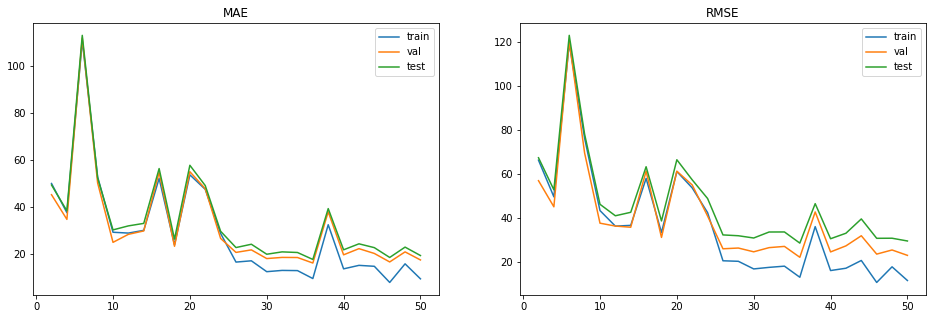

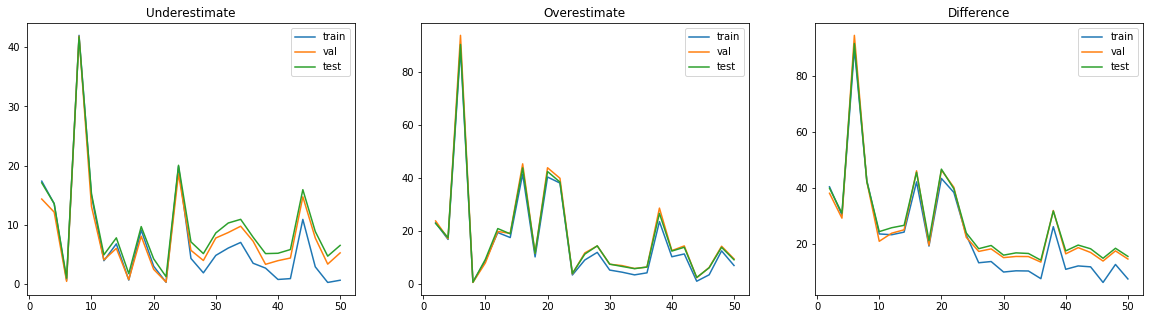

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plot_results(res_list, metric='MAE', new_figure=False)
plt.subplot(1, 2, 2)
plot_results(res_list, metric='RMSE', new_figure=False)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_results(res_list, metric='Underestimate', new_figure=False)
plt.subplot(1, 3, 2)
plot_results(res_list, metric='Overestimate', new_figure=False)
plt.subplot(1, 3, 3)
plot_results(res_list, metric='Difference', new_figure=False)